In [3]:
pip install pandas-datareader yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

# Set the ticker symbol
ticker = "NFLX"

# Set the start and end dates
start_date = "2023-01-01"
end_date = "2024-04-01"

# Fetch data using yfinance directly
data = yf.download(ticker, start=start_date, end=end_date)



# Save the data to a CSV file
data.to_csv("NFLX_2023_2024.csv")

# Print a message confirming the download
print("Data has been downloaded and saved to NFLX_2023_2024.csv")



[*********************100%%**********************]  1 of 1 completed

Data has been downloaded and saved to NFLX_2023_2024.csv


In [5]:
import pandas as pd
import numpy as np

In [6]:
Netflix = pd.read_csv("NFLX_2023_2024.csv")

In [7]:
print(Netflix.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  298.059998  298.390015  288.700012  294.950012  294.950012   
1  2023-01-04  298.239990  311.140015  295.510010  309.410004  309.410004   
2  2023-01-05  307.000000  314.179993  304.549988  309.700012  309.700012   
3  2023-01-06  311.570007  316.769989  303.690002  315.549988  315.549988   
4  2023-01-09  316.829987  321.700012  313.220001  315.170013  315.170013   

    Volume  
0  6764000  
1  9345100  
2  8328400  
3  8959800  
4  6766600  


In [8]:
print(Netflix.tail())

           Date        Open        High         Low       Close   Adj Close  \
306  2024-03-22  624.159973  629.049988  621.000000  628.010010  628.010010   
307  2024-03-25  627.900024  630.460022  623.159973  627.460022  627.460022   
308  2024-03-26  625.200012  634.390015  619.179993  629.239990  629.239990   
309  2024-03-27  629.010010  631.349976  610.729980  613.530029  613.530029   
310  2024-03-28  614.989990  615.000000  601.590027  607.330017  607.330017   

      Volume  
306  2134100  
307  1803300  
308  2804500  
309  2628300  
310  3708800  


In [9]:
# Setting display options to show all values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [10]:
print("\nDescriptive statistics of the dataset:")
Netflix.describe()


Descriptive statistics of the dataset:


,Open,High,Low,Close,Adj Close,Volume
count,311.00,311.00,311.00,311.00,311.00,311.00
mean,424.12,429.81,418.76,424.29,424.29,6039192.28
std,87.88,88.25,87.37,87.79,87.79,3972035.35
min,287.34,297.45,285.33,292.76,292.76,1404700.00
25%,349.74,359.32,345.55,351.91,351.91,3745250.00
50%,418.83,425.82,414.50,420.02,420.02,4996600.00
75%,472.81,478.37,465.58,474.01,474.01,6880600.00
max,630.65,634.39,623.16,629.24,629.24,28430300.00


In [11]:
# See the Rows and Columns of the dataset
Netflix.shape

(311, 7)

In [12]:
# Information on the dataset
print("\nInformation about the DataFrame after converting 'Date' column to datetime format:")
print("\n")
Netflix.info()


Information about the DataFrame after converting 'Date' column to datetime format:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       311 non-null    object 
 1   Open       311 non-null    float64
 2   High       311 non-null    float64
 3   Low        311 non-null    float64
 4   Close      311 non-null    float64
 5   Adj Close  311 non-null    float64
 6   Volume     311 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.1+ KB


In [13]:
#CHANGING THE FORMAT FROM OBJECT 
Netflix['Date'] = pd.to_datetime(Netflix['Date'])


In [14]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       311 non-null    datetime64[ns]
 1   Open       311 non-null    float64       
 2   High       311 non-null    float64       
 3   Low        311 non-null    float64       
 4   Close      311 non-null    float64       
 5   Adj Close  311 non-null    float64       
 6   Volume     311 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 17.1 KB


## DATA CLEANING

In [15]:
# Checking wether the data contains any 'null' values
Netflix.notnull() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
306,True,True,True,True,True,True,True
307,True,True,True,True,True,True,True
308,True,True,True,True,True,True,True
309,True,True,True,True,True,True,True


In [17]:
# Calculating the number of null values in each column
null_counts = Netflix.isnull().sum()
# Displaying the number of null values in each column
print("Number of null values in each column:")
print(null_counts)


Number of null values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [19]:
# CheckING Duplication
Netflix.duplicated()
# Return boolean Series denoting duplicate rows.


0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

## Time Series Analysis

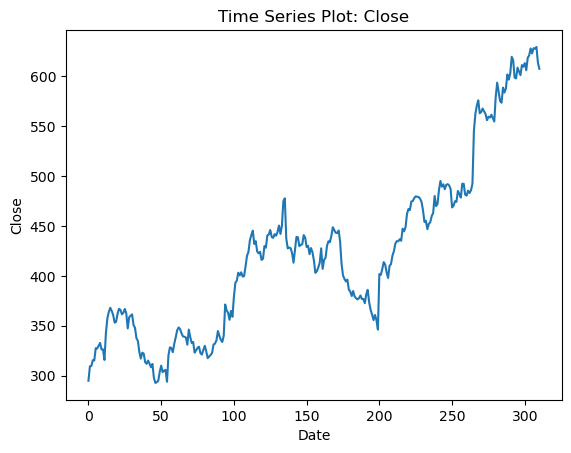

In [34]:
import matplotlib.pyplot as plt

def time_series_plot(Netflix, column_name):
    """
    Plot a time series from a DataFrame.

    Parameters:
    - Netflix: DataFrame containing the time series data.
    - column_name: Name of the column to plot.
    """
    # Geting the date column from the DataFrame
    x = Netflix.index

    # Checking if the specified column exists in the DataFrame
    if column_name in Netflix.columns:
        # Geting the values for the specified column
        y = Netflix[column_name]

        # Plot the time series
        plt.plot(x, y)
        plt.xlabel('Date')
        plt.ylabel(column_name)
        plt.title('Time Series Plot: ' + column_name)
        plt.show()
    else:
        print("Error: The specified column does not exist in the DataFrame.")


time_series_plot(Netflix, 'Close')


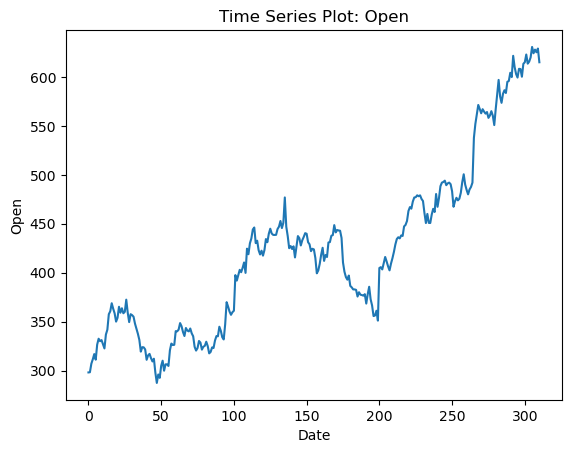

In [35]:
time_series_plot(Netflix, 'Open')

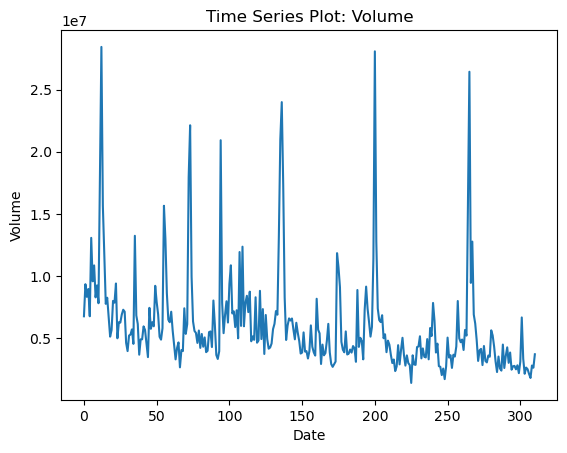

In [36]:
time_series_plot(Netflix, 'Volume')

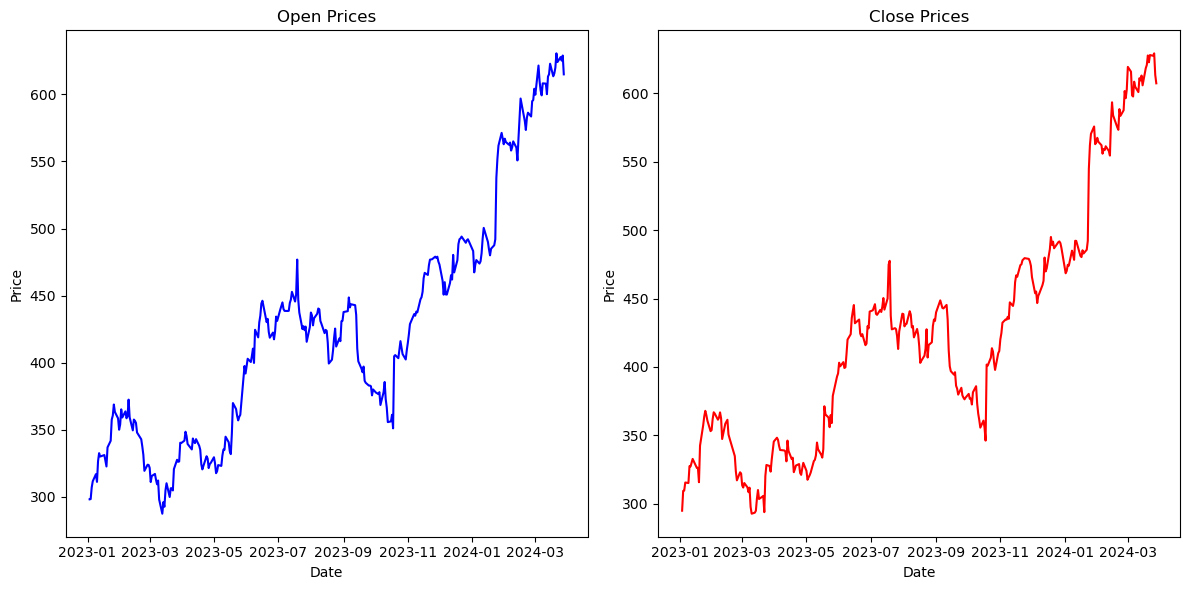

In [41]:
def time_series_plot(dataframe):
 '''
 This function generates a side-by-side comparison of time series
plots for the "Open" and "Close" columns.

 Args:
 dataframe: The DataFrame containing the time series data.

 Returns:
 None
 '''
 # Geting the date column from the DataFrame
 x = dataframe['Date']

 # Geting the values for the "Open" and "Close" columns
 open_prices = dataframe['Open']
 close_prices = dataframe['Close']

 # Creating a figure and two subplots side by side
 fig, axs = plt.subplots(1, 2, figsize=(12, 6))

 # Plot the time series for the "Open" column
 axs[0].plot(x, open_prices, color='blue')
 axs[0].set_title('Open Prices')
 axs[0].set_xlabel('Date')
 axs[0].set_ylabel('Price')

 # Plot the time series for the "Close" column
 axs[1].plot(x, close_prices, color='red')
 axs[1].set_title('Close Prices')
 axs[1].set_xlabel('Date')
 axs[1].set_ylabel('Price')

 # Adjusting layout to prevent overlap of labels
 plt.tight_layout()

 # Display the plot
 plt.show()
# Call the function with y

# Call the function with your DataFrame
time_series_plot(Netflix)


## Descriptive Statistics

In [43]:
import pandas as pd
def descriptive_statistics(dataframe):
 '''
 This function calculates descriptive statistics for the "Open" and
"Close" columns of the given DataFrame.

 Args:
 dataframe: The DataFrame containing the time series data.

 Returns:
 open_stats: A dictionary containing descriptive statistics for
the "Open" column.
 close_stats: A dictionary containing descriptive statistics
for the "Close" column.
 '''
 # Calculating descriptive statistics for the "Open" column
 open_stats = dataframe['Open'].describe()

 # Calculating descriptive statistics for the "Close" column
 close_stats = dataframe['Close'].describe()

 return open_stats, close_stats
# Call the function with your DataFrame
open_stats, close_stats = descriptive_statistics(Netflix)
# Print the descriptive statistics
print("Descriptive Statistics for the 'Open' column:")
print(open_stats)
print("\nDescriptive Statistics for the 'Close' column:")
print(close_stats)


Descriptive Statistics for the 'Open' column:
count   311.00
mean    424.12
std      87.88
min     287.34
25%     349.74
50%     418.83
75%     472.81
max     630.65
Name: Open, dtype: float64

Descriptive Statistics for the 'Close' column:
count   311.00
mean    424.29
std      87.79
min     292.76
25%     351.91
50%     420.02
75%     474.01
max     629.24
Name: Close, dtype: float64


## Correlation Matrix


In [44]:
def correlation_analysis(dataframe):
 '''
 This function performs correlation analysis between the "Open",
"High", "Low", and "Close" columns.

 Args:
 dataframe: The DataFrame containing the time series data.

 Returns:
 correlations: A DataFrame containing the correlation
coefficients between the columns.
 '''
 # Select the columns for correlation analysis
 columns_of_interest = ['Open', 'High', 'Low', 'Close']

 # Calculate the correlation matrix
 correlations = dataframe[columns_of_interest].corr()

 return correlations
# Call the function with your DataFrame
correlations = correlation_analysis(Netflix)
# Print the correlation matrix
print("Correlation Matrix:")
print(correlations)


Correlation Matrix:
       Open  High  Low  Close
Open   1.00  1.00 1.00   1.00
High   1.00  1.00 1.00   1.00
Low    1.00  1.00 1.00   1.00
Close  1.00  1.00 1.00   1.00


##  Highest and Lowest Share Prices

In [49]:
# Find the row with the highest closing price
max_close_row = Netflix.loc[Netflix['Close'].idxmax()]

# Find the row with the lowest closing price
min_close_row = Netflix.loc[Netflix['Close'].idxmin()]

# Find the row with the highest volume
max_volume_row = Netflix.loc[Netflix['Volume'].idxmax()]

# Find the row with the lowest volume
min_volume_row = Netflix.loc[Netflix['Volume'].idxmin()]

# Print the results
print("Date with the highest closing price:", max_close_row['Date'], "| Price:", max_close_row['Close'])

print("Date with the lowest closing price:", min_close_row['Date'], "| Price:", min_close_row['Close'])

print("Date with the highest volume:", max_volume_row['Date'], "| Volume:", max_volume_row['Volume'])

print("Date with the lowest volume:", min_volume_row['Date'], "| Volume:", min_volume_row['Volume'])

Date with the highest closing price: 2024-03-26 00:00:00 | Price: 629.239990234375
Date with the lowest closing price: 2023-03-10 00:00:00 | Price: 292.760009765625
Date with the highest volume: 2023-01-20 00:00:00 | Volume: 28430300
Date with the lowest volume: 2023-11-24 00:00:00 | Volume: 1404700


## Seasonality in Stock Prices

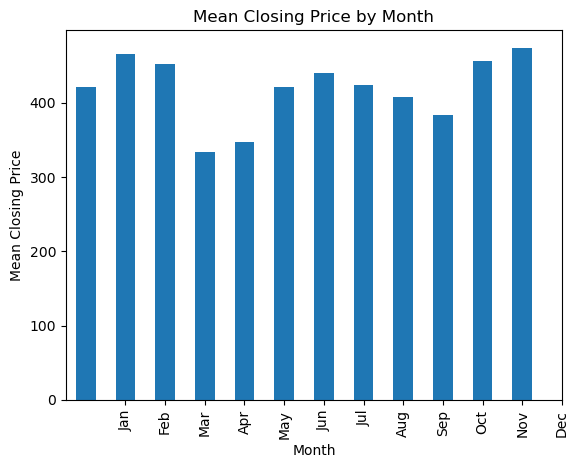

In [53]:
# Grouping data by month and calculate mean closing price for each month
monthly_data = Netflix.groupby(Netflix['Date'].dt.month)['Close'].mean()

# Visualizing the mean closing price for each month
monthly_data.plot(kind='bar', xlabel='Month', ylabel='Mean Closing Price', title='Mean Closing Price by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


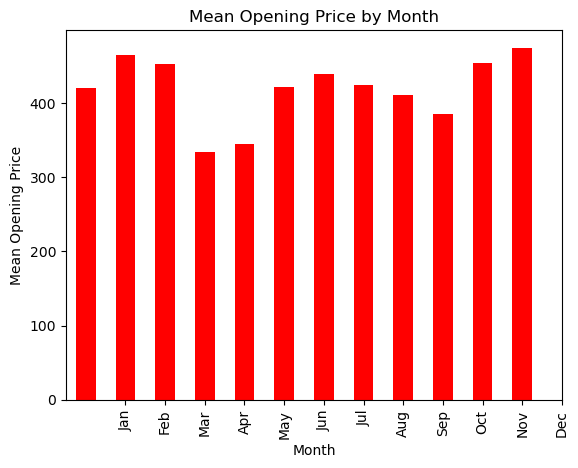

In [54]:
# Grouping data by month and calculate mean closing price for each month
monthly_data = Netflix.groupby(Netflix['Date'].dt.month)['Open'].mean()

# Visualize the mean opening price for each month
monthly_data.plot(kind='bar', xlabel='Month', ylabel='Mean Opening Price', title='Mean Opening Price by Month', color='r')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


C:\Users\MONICAH\AppData\Local\Temp\ipykernel_8948\1515658782.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Netflix.corr()


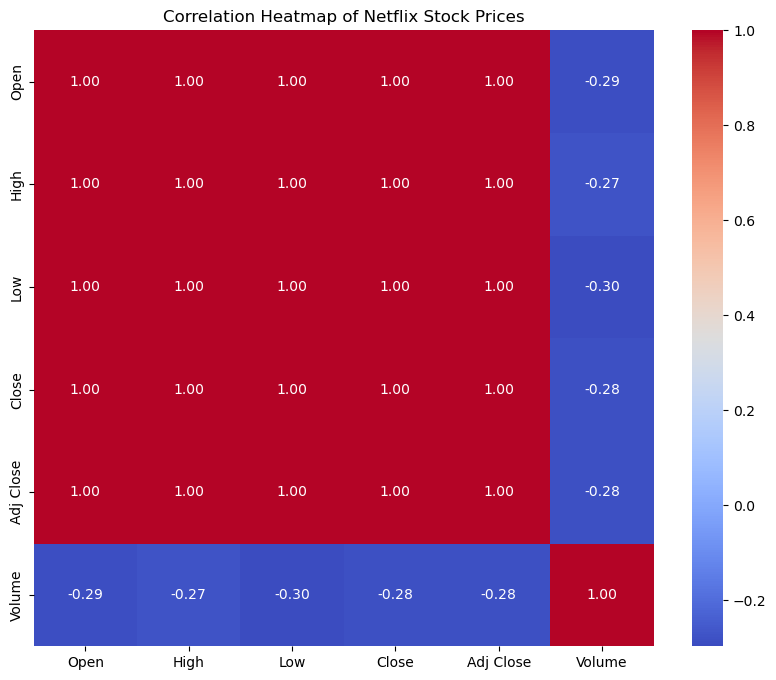

In [56]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = Netflix.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap of Netflix Stock Prices')
plt.show()



In [58]:
# Creat a pivot table
pivot_table = Netflix.pivot_table(index='Date', values=['Open',
'High', 'Low', 'Close'], aggfunc='mean')
# Display the pivot table
print("Pivot Table:")
print(pivot_table)



Pivot Table:
            Close   High    Low   Open
Date                                  
2023-01-03 294.95 298.39 288.70 298.06
2023-01-04 309.41 311.14 295.51 298.24
2023-01-05 309.70 314.18 304.55 307.00
2023-01-06 315.55 316.77 303.69 311.57
2023-01-09 315.17 321.70 313.22 316.83
...           ...    ...    ...    ...
2024-03-22 628.01 629.05 621.00 624.16
2024-03-25 627.46 630.46 623.16 627.90
2024-03-26 629.24 634.39 619.18 625.20
2024-03-27 613.53 631.35 610.73 629.01
2024-03-28 607.33 615.00 601.59 614.99

[311 rows x 4 columns]


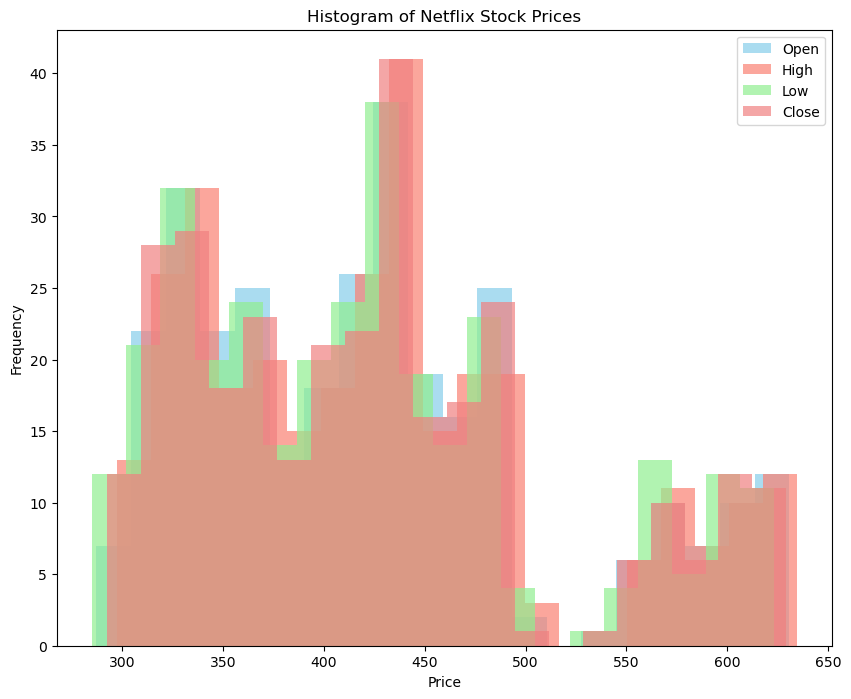

In [60]:
# Histogram
plt.figure(figsize=(10, 8))
plt.hist(Netflix['Open'], bins=20, color='skyblue', alpha=0.7,label='Open')
plt.hist(Netflix['High'], bins=20, color='salmon', alpha=0.7,label='High')
plt.hist(Netflix['Low'], bins=20, color='lightgreen', alpha=0.7,label='Low')
plt.hist(Netflix['Close'], bins=20, color='lightcoral', alpha=0.7,label='Close')
plt.title('Histogram of Netflix Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Extracting input features and target variable
X = Netflix[['Open', 'High', 'Low', 'Volume']]
# Input features: Open, High, Low, Volume
y = Netflix['Close'] # Target variable: Close
# Initializing the linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X, y)
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [-5.26462221e-01  6.16924597e-01  9.11187617e-01  7.40120198e-08]
Intercept: 0.3982310984745254


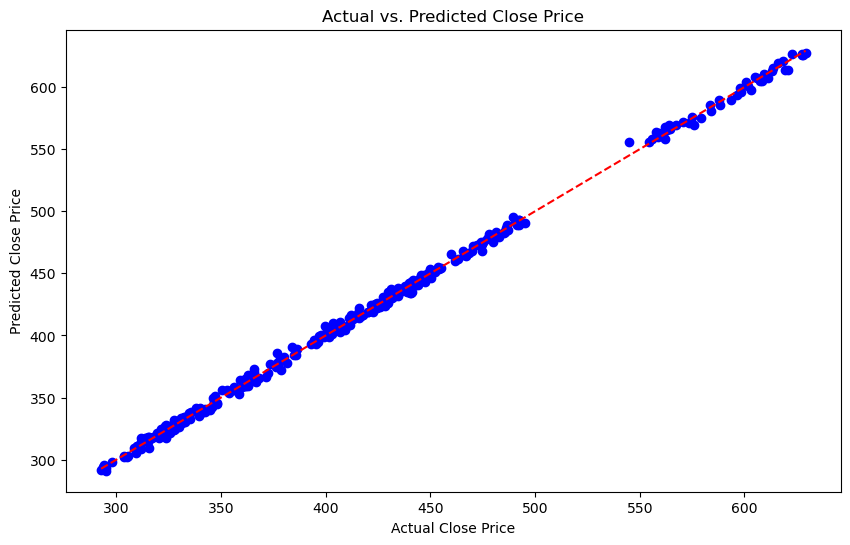

In [64]:
# predictions on the training data
y_pred = model.predict(X)
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red',
linestyle='--')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()

In [68]:
import numpy as np

# Define the coefficients and intercept for the linear regression
modelcoefficients = model.coef_ 
intercept = model.intercept_

# Defining a function to make predictions
def predict_price(features):
    # Calculate the dot product of coefficients and features, then add the intercept 
    predicted_price = np.dot(modelcoefficients, features) + intercept
    return predicted_price


input_features = np.array([350, 360, 345, 8000000])  

predicted_price = predict_price(input_features)
print(f"Predicted Price is {predicted_price:.02f}")


Predicted Price is 353.18
